# Liniowe modele regresji

## Wstęp

Algorytmy regresyjne należą do grupy *uczenia nadzorowanego* (Supervised Learning). Inaczej mówiąc, są to algorytmy mające określoną zmienną celu (target) oraz zdefiniowane zmienne wejściowe. W odróżnieniu od klasyfikacji, w regresji zmienna celu jest liczbą rzeczywistą. Analiza regresji jest jedną z metod analizy statystycznej pozwalających opisać zależność między zmienną objaśnianą $y \in \mathbb{R}$ (zmienna celu, zmienna zależna) oraz zmienną, bądź kilkoma, zmiennymi objaśniającymi (niezależnymi) $x \in \mathbb{R}^d$.

Załóżmy, że chcemy wystawić na sprzedaż dom, ale nie znamy jego wartości. Powinniśmy zatem przyjrzeć się innym domom w okolicy, sprzedanym w niedalekiej przeszłości i na podstawie cen sprzedaży oraz innych czynników, takich jak ilość sypialni czy powierzchnia użytkowa, określić wartość domu, który chcemy sprzedać. 

W badanym przypadku, zmienną zależną będzie cena domu, natomiast zmiennymi niezależnymi będą ilość sypialni, ilość łazienek, powierzchnia w m2, rok budowy itd. Znajdując zależność między tymi zmiennymi, będziemy w stanie określić jakie czynniki mają faktyczny wpływ na wartość domu oraz który czynnik jest najbardziej istotny, a także przewidzieć cenę za jaką sprzedamy nasz dom. 

***
Poniżej zostaną przedstawione 4 następujące algorytmy regresyjne:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Polynomial Regression

Dodatkowo w formie skróconej zostanie opisane działanie sieci neuronowych.

In [1]:
# Biblioteki
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures

## Linear Regression

Załóżmy, że mamy wektor $X^T = (1, x_1, x_2,\dots, x_p)$ i chcemy przewidzieć wartość zmiennej $y$. Model regresji liniowej przedstawia się następująco: 
$$f(X) = \sum_{j=0}^p x_j \beta_j + \epsilon_j,$$

gdzie $\beta_j$ nazywane są współczynnikami, a $\epsilon_j$ jest składnikiem losowym. 

Model regresji liniowej zakłada, że warunkowa wartość oczekiwana $E(Y|X)$ jest funkcją liniową. 

Najpopularniejszą metodą estymacji liniowej zależności jest <b>metoda najmniejszych kwadratów</b>, która wyznacza współczynniki $\beta$ funkcji

$$\hat{f}(X) = \sum_{j=0}^p x_j \beta_j$$
tak, aby zminimalizować błąd kwadratowy
    $$RSS(\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 = \big(X \beta - y\big)^T \big(X \beta - y\big).$$


Matematycznie problem ten można opisać wzorem:


$$ 	\frac{\partial RSS}{\partial \hat{\beta}} = 0$$


Po zróżniczkowaniu i po przekształceniach otrzymujemy wzór na współczynniki $\hat{\beta}$:

$$ \hat{\beta} = (X^TX)^{-1} X^T y$$

Poniższa ramka danych zawiera informację o cenie sprzedaży domów oraz ich powierzchni.

In [2]:
#Stworzenie ramki danych
data = pd.DataFrame(([76, 350], [80, 370], [150, 540], [200, 600], [50, 300], [300, 800], [120, 490], [130, 500],
                    [250, 700], [120, 700]), 
                   columns=['M2', 'Cena'])
data

,M2,Cena
0,76,350
1,80,370
2,150,540
3,200,600
4,50,300
5,300,800
6,120,490
7,130,500
8,250,700
9,120,700


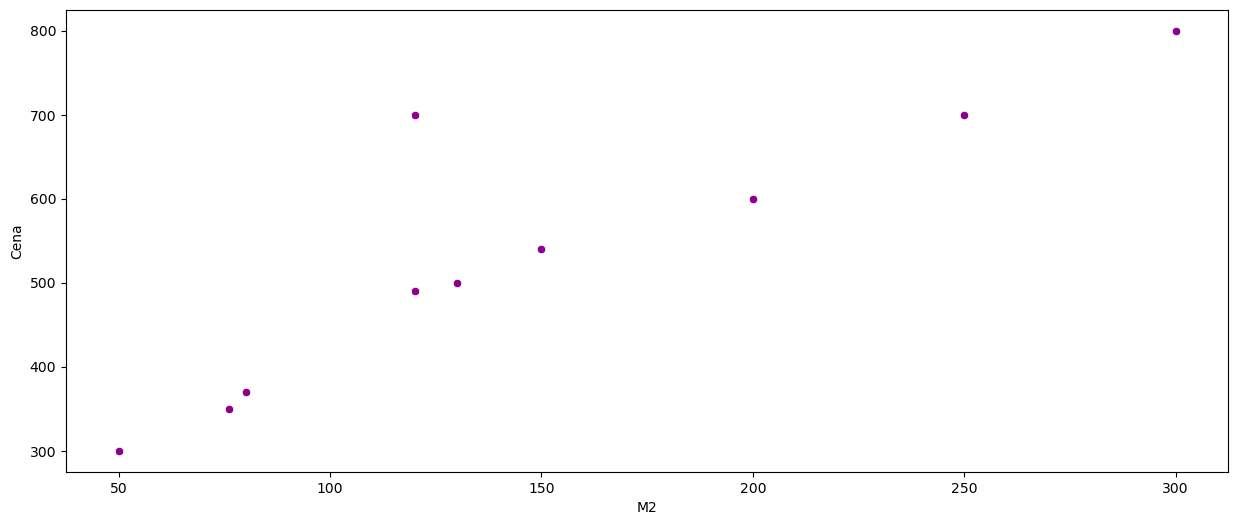

In [3]:
# Parametry do wizualizacji
plt.rcParams["figure.figsize"] = (15,6)

# Wizualizacja danych
sns.scatterplot(x=data['M2'], y=data['Cena'], color='darkmagenta')
plt.show()

Możemy założyć, że istnieje liniowa zależność pomiędzy ceną domu, a powierzchnią w m2. Czyli, szukamy funkcji $\hat{f}$ takiej, że: 

$$cena \approx \hat{ \beta}_0 + \hat{\beta}_1 \cdot m2 \$$ 




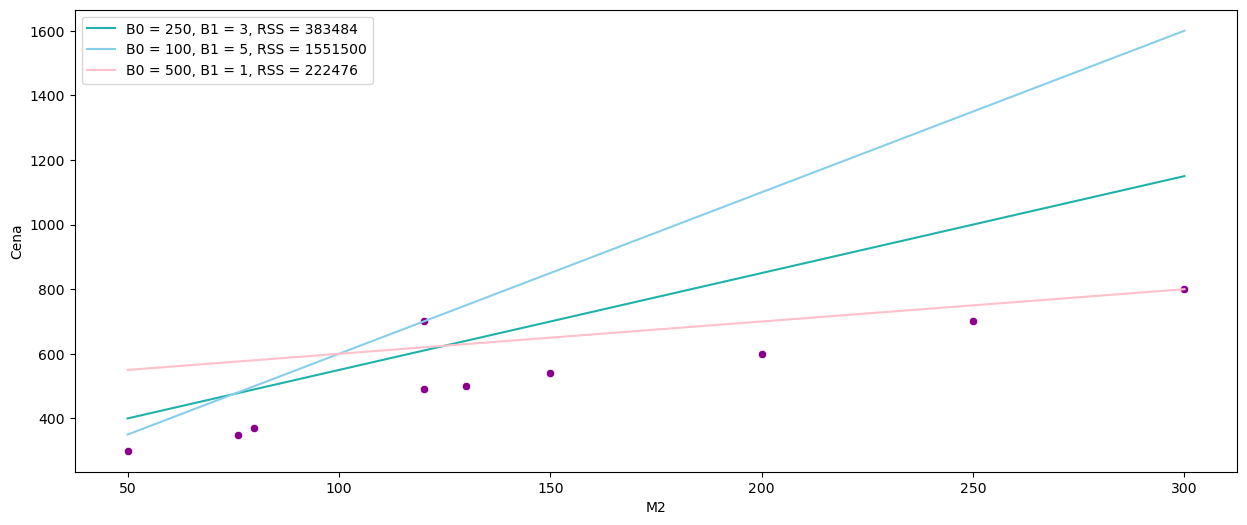

In [4]:
y=data['Cena']
sns.scatterplot(x=data['M2'], y=y, color='darkmagenta')
sns.lineplot(data=data, x=data['M2'], y = 3 * data['M2'] + 250, color = 'lightseagreen', label = "B0 = 250, B1 = 3, RSS = " + str(np.sum(np.square(3 * data['M2'] + 250 - y))))
sns.lineplot(data=data, x=data['M2'], y = 5 * data['M2'] + 100, color = 'skyblue', label = "B0 = 100, B1 = 5, RSS = " + str(np.sum(np.square(5 * data['M2'] + 100 - y))))
sns.lineplot(data=data, x=data['M2'], y = 1 * data['M2'] + 500, color = 'pink', label = "B0 = 500, B1 = 1, RSS = " + str(np.sum(np.square(1 * data['M2'] + 500 - y))))
plt.legend()
plt.show()

Widzimy, że najmniejszy błąd kwadratowy daje nam różowa linia. 
Aby znaleźć najlepsze z możliwych rozwiązań, wykorzystamy funkcję LinearRegression z biblioteki scikit-learn do znalezienia wartości współczynników $ \hat{ \beta}_0, \hat{ \beta}_1$ metodą najmniejszych kwadratów.

In [5]:
X = data.loc[:, 'M2']
X = X.values.reshape(-1, 1)
y = data.loc[:, 'Cena']
reg = LinearRegression(positive=False,        # positive=True może być przydatne, gdy wszystkie współczynniki muszą być nieujemne, np. ceny towarów.
                       fit_intercept=True)    # Jeśli ustawione na False, wyraz wolny nie będzie uwzględniany w obliczeniach.
reg.fit(X,y)

LinearRegression()

In [6]:
# Współczynnik
reg.coef_

array([1.83141395])

In [7]:
# Wyraz wolny
reg.intercept_

264.68330134357

Znaleziona funkcja przedstawia się następująco:

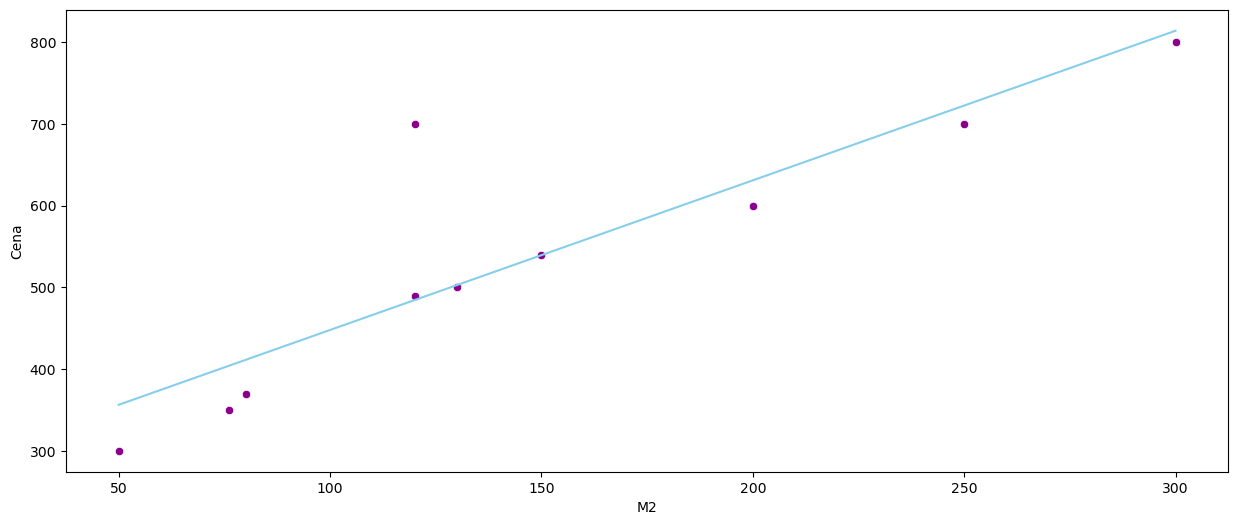

In [8]:
sns.scatterplot(x=data['M2'], y=data['Cena'], color='darkmagenta')
sns.lineplot(data=data, x=data['M2'], y = reg.coef_ * data['M2'] + reg.intercept_, color = 'skyblue')
plt.show()

Błąd kwadratowy w tym przypadku wynosi: 

In [9]:
y_pred = reg.predict(X)
np.sum(np.square(y_pred - y))

55928.854766474724

***

## Ridge Regression

*Overtfitting* to nadmierne dopasowanie modelu do danych, przez co na zbiorze treningowym błąd kwadratowy będzie bliski zeru, natomiast na zbiorze testowym będzie bardzo duży. W regresji liniowej zjawisko to, wystąpić może w przypadku, gdy mamy mniej obserwacji niż predyktorów. 

<!-- <img src="media/variance_tradeoff.png" width=700 height=400 /> 
 -->
![media](media/variance_tradeoff.png)


*Źródło: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff*

W celu rozwiązania problemu przeuczenia modelu, należy znaleźć kompromis między wariancją a przeciążeniem. Dokonać tego można dodając regularyzację do modelu.

**Norma $Lp$**

Niech $x = (x_1, x_2, ..., x_n) \in \mathbf{X}$. Funkcje postaci
$$ ||x||_p = (|x_1|^p + |x_2|^p + ... |x_n|^p ) ^{\frac{1}{p}} $$

są normami dla $ 1 \leq p < \infty $. Normę $||x||_2 $ nazywa się *normą euklidesową*. 





<b> Ridge Regression</b> wykorzystuje normę euklidesową $L2$, aby "ukarać" model za wielkość współczynników. Wtedy zamiast minimalizacji błędu resztowych sum kwadratów, minimalizowana jest funkcja: 

$$RSS_{Ridge} (\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 + \alpha \sum_{j=1}^{p} \beta_j^2, $$

gdzie $\alpha$ jest hiperparametrem, nazywanym współczynnikiem kary. Przyjmuje wartości $\alpha \geq 0$. Im wyższa jego wartość, tym model jest bardziej "karany".
***

Dla celów edukacyjnych podzielimy zbiór tak, aby w zbiorze treningowym były tylko 2 obserwacje. Jest to zabieg celowy, gdyż chcemy pokazać przykład overtfittingu. 

In [10]:
data_train, data_test = train_test_split(data, test_size = 0.8, random_state = 10)
X_train = data_train.loc[:, 'M2']
y_train = data_train.loc[:, 'Cena']
X_test = data_test.loc[:, 'M2']
y_test = data_test.loc[:, 'Cena']

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [11]:
X = data.loc[:, 'M2']
y = data.loc[:, 'Cena']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 10)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

Często $\alpha$ wybiera się z przedziału $[0,1]$. W naszym przypadku wartości te są zbyt małe, więc musieliśmy ją znacznie zwiększyć. Ponieważ $\alpha$ jest hiperparametrem, w celu znalezienia najlepszej wartości można wykorzystać *walidację krzyżową*. 

In [12]:
ridge1 = Ridge(alpha = 0)       # warto zwrócić uwagę, że alpha = 0 daje nam zwykłą regresję liniową
ridge1.fit(X_train, y_train)

Ridge(alpha=0)

In [13]:
ridge2 = Ridge(alpha = 200)
ridge2.fit(X_train, y_train)

Ridge(alpha=200)

In [14]:
ridge3 = Ridge(alpha = 1000)
ridge3.fit(X_train, y_train)

Ridge(alpha=1000)

In [15]:
ridge4 = Ridge(alpha = 5000)
ridge4.fit(X_train, y_train)

Ridge(alpha=5000)

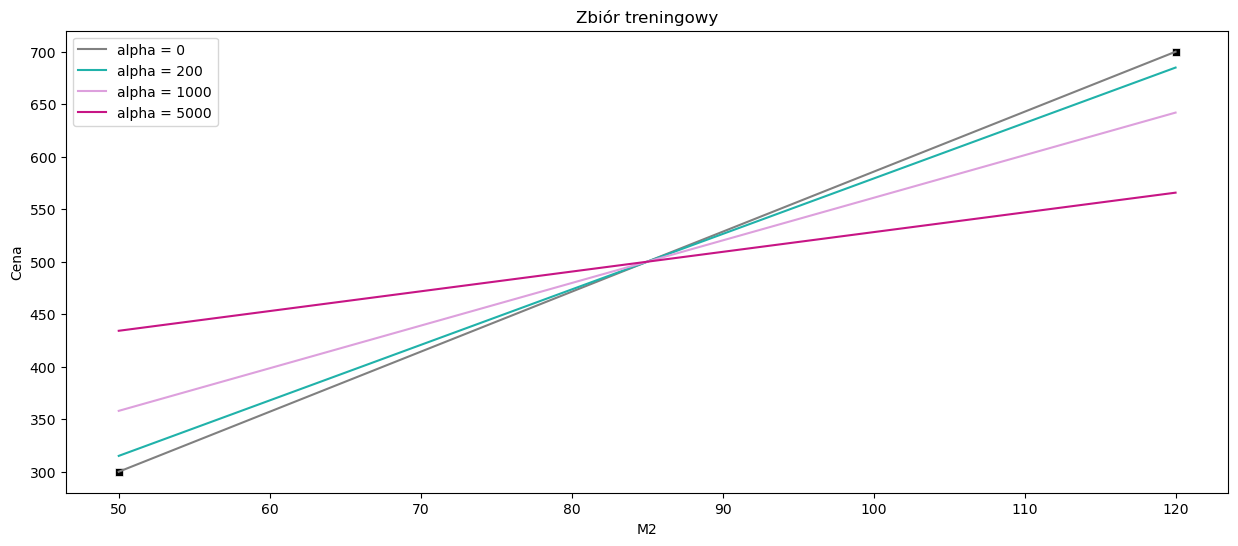

In [16]:
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='black', marker = 's')
sns.lineplot(data=data, x=data_train['M2'], y = ridge1.coef_ * data_train['M2'] + ridge1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data_train['M2'], y = ridge2.coef_ * data_train['M2'] + ridge2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data_train['M2'], y = ridge3.coef_ * data_train['M2'] + ridge3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data_train['M2'], y = ridge4.coef_ * data_train['M2'] + ridge4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór treningowy")
plt.show()

Możemy zauważyć, że na zbiorze treningowym regresja liniowa dopasowuje się idealnie do obserwacji, gdzie regresja grzbietowa (ridge regression) wraz ze wzrostem parametru $\alpha$ wydaje się mieć coraz gorsze dopasowanie. Zobaczmy jak to wygląda na zbiorze testowym. 

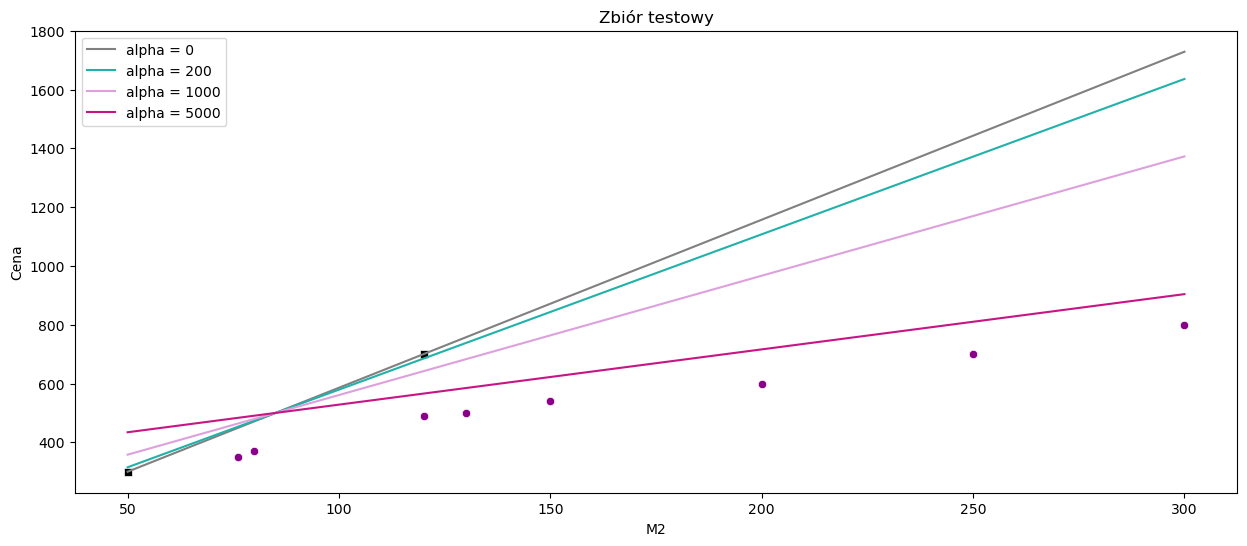

In [17]:
sns.scatterplot(x=data_test['M2'], y=data_test['Cena'], color='darkmagenta')
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='black', marker = 's')
sns.lineplot(data=data, x=data['M2'], y = ridge1.coef_ * data['M2'] + ridge1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data['M2'], y = ridge2.coef_ * data['M2'] + ridge2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data['M2'], y = ridge3.coef_ * data['M2'] + ridge3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data['M2'], y = ridge4.coef_ * data['M2'] + ridge4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór testowy")
plt.show()

W przypadku regresji liniowej widoczny jest **overfittting**. Linia przechodzi dokładnie przez dwie obserwacje ze zbioru treningowego, zatem błąd kwadratowy będzie równy zero, natomiast na zbiorze testowym błąd ten będzie bardzo duży. Aby zapobiec takiej sytuacji, została wykorzystana Ridge Regression.

In [18]:
wyniki = pd.DataFrame(data = {'RSS':[round(np.sum(np.square(ridge1.predict(X_test) - y_test)),0), 
                                     round(np.sum(np.square(ridge2.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(ridge3.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(ridge4.predict(X_test) - y_test)),0)
                                    ],
                             'R2': [metrics.r2_score(y_test, ridge1.predict(X_test)),
                                   metrics.r2_score(y_test, ridge2.predict(X_test)),
                                   metrics.r2_score(y_test, ridge3.predict(X_test)),
                                   metrics.r2_score(y_test, ridge4.predict(X_test))],
                             'MAE': [metrics.mean_absolute_error(y_test, ridge1.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge2.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge3.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge4.predict(X_test))]}, 
                      index=['alpha = 0', 'alpha = 200', 'alpha = 1000', 'alpha = 5000']).style.background_gradient(cmap='Blues')
wyniki

,RSS,R2,MAE
alpha = 0,1964561.000000,-10.849875,403.392857
alpha = 200,1615208.000000,-8.742643,369.646226
alpha = 1000,814095.000000,-3.910474,273.786232
alpha = 5000,88315.000000,0.467297,103.296980


Widzimy, że im większy współczynnik kary, tym model jest bardziej dopasowany do pozostałych obserwacji. 

***

## Lasso Regression

**Lasso Regression** jest kolejną metodą służącą do redukcji overfittingu, ale tym razem wykorzystującą do regularyzacji normę $L1$. 

Funkcja celu modelu Lasso Regression wygląda następująco: 

$$RSS_{Lasso} (\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 + \alpha \sum_{j=1}^{p} |\beta_j|, $$

In [19]:
lasso1 = Lasso(alpha = 0.001)
lasso1.fit(X_train, y_train)

Lasso(alpha=0.001)

In [20]:
lasso2 = Lasso(alpha = 200)
lasso2.fit(X_train, y_train)

Lasso(alpha=200)

In [21]:
lasso3 = Lasso(alpha = 1000)
lasso3.fit(X_train, y_train)

Lasso(alpha=1000)

In [22]:
lasso4 = Lasso(alpha = 5000)
lasso4.fit(X_train, y_train)

Lasso(alpha=5000)

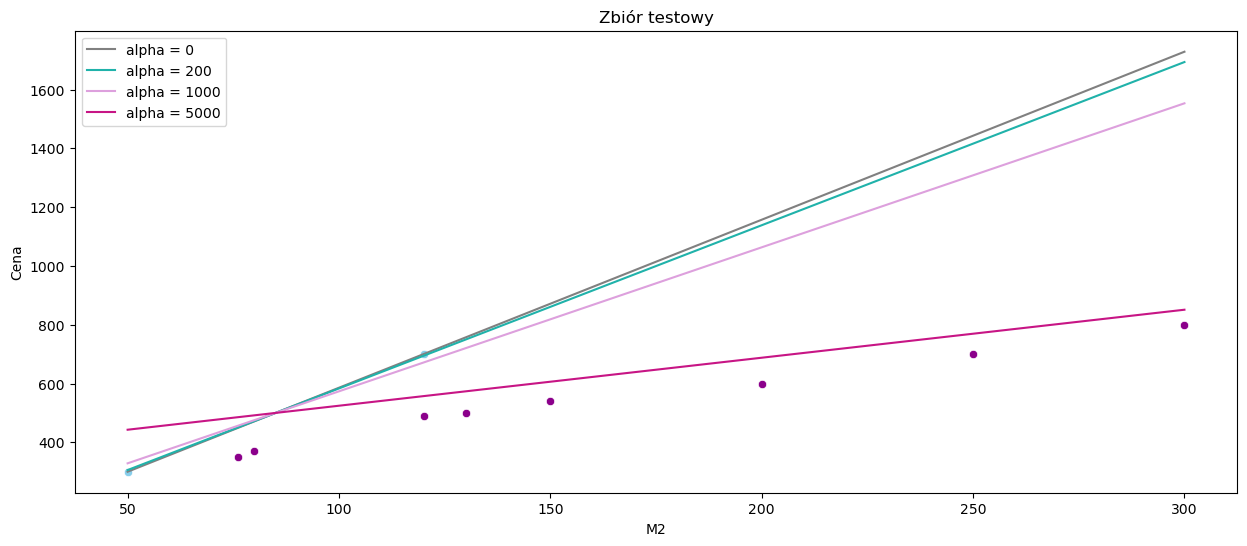

In [23]:
sns.scatterplot(x=data_test['M2'], y=data_test['Cena'], color='darkmagenta')
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='skyblue')
sns.lineplot(data=data, x=data['M2'], y = lasso1.coef_ * data['M2'] + lasso1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data['M2'], y = lasso2.coef_ * data['M2'] + lasso2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data['M2'], y = lasso3.coef_ * data['M2'] + lasso3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data['M2'], y = lasso4.coef_ * data['M2'] + lasso4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór testowy")
plt.show()

Tutaj również możemy wyciągnąć wniosek, że im większy współczynnik kary, tym dopasowanie modelu jest lepsze. 

In [24]:
wyniki2 = pd.DataFrame(data = {'RSS':[round(np.sum(np.square(lasso1.predict(X_test) - y_test)),0), 
                                     round(np.sum(np.square(lasso2.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(lasso3.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(lasso4.predict(X_test) - y_test)),0)
                                    ],
                             'R2': [metrics.r2_score(y_test, lasso1.predict(X_test)),
                                   metrics.r2_score(y_test, lasso2.predict(X_test)),
                                   metrics.r2_score(y_test, lasso3.predict(X_test)),
                                   metrics.r2_score(y_test, lasso4.predict(X_test))],
                             'MAE': [metrics.mean_absolute_error(y_test, lasso1.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso2.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso3.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso4.predict(X_test))]}, 
                      index=['alpha = 0', 'alpha = 200', 'alpha = 1000', 'alpha = 5000']).style.background_gradient(cmap='Blues')
wyniki2

,RSS,R2,MAE
alpha = 0,1964561.000000,-10.849871,403.392793
alpha = 200,1828182.000000,-10.027261,390.617347
alpha = 1000,1332914.000000,-7.039895,339.515306
alpha = 5000,62549.000000,0.622717,84.005102


Używanie normy $L1$ może także spowodować, że w przypadku modelu o kilku zmiennych objaśniających, współczynniki dla niektórych z nich zostaną wyzerowane.

**Interpretacja geometryczna**

<!-- 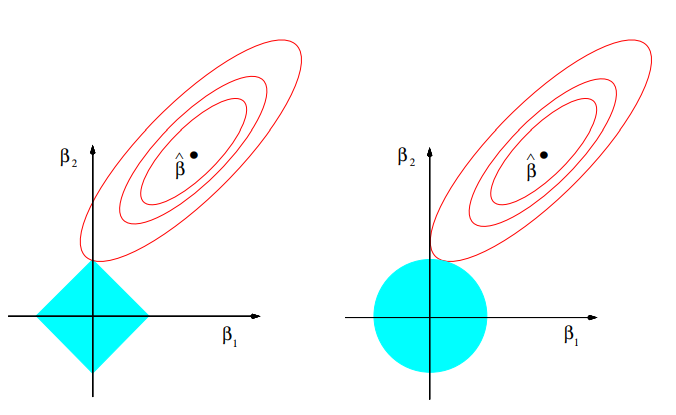 -->

<!-- <img src="media/norms.png" width=700 height=400 /> 
 -->
![media](media/norms.png)


Źródło: *The Elements of Statistical Learning* Trevor Hastie, Robert Tibshirani, Jerome Friedman, Second Edition. 


Czerwone elipsy odpowiadają za błąd kwadratowy, natomiast niebieskie kolory przedstawiają kulę w metrykach $L1$ i $L2$ odpowiednio. W związku z tym, że kula w metryce $L1$ ma kwadratowy kształt, to kiedy suma resztowa kwadratów znajdzie się w jednym z rogów, współczynnik jest zerowany. W Ridge Regression współczynniki te zbliżają się do zera, ale nigdy nie osiągają wartości równej 0. 

Z tego też względu **Lasso Regression** jest często wykorzystywane również do wyboru zmiennych modelu. 

***

## Polynomial Regression

Weźmy teraz nowy, nieco bardziej abstrakcyjny zbiór danych, zdefiniowany jako argumenty i wartości pewnej funkcji, przy czym do wartości dodajmy nieco szumu losowego.

In [25]:
N = 125
np.random.seed(23)
x = np.random.rand(N,1) * 2 - 1
noise = np.random.normal(0,0.2,size=(N,1))
y = x ** 2 + 0.5 * np.sin(x) + noise

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 11, test_size = 0.2)

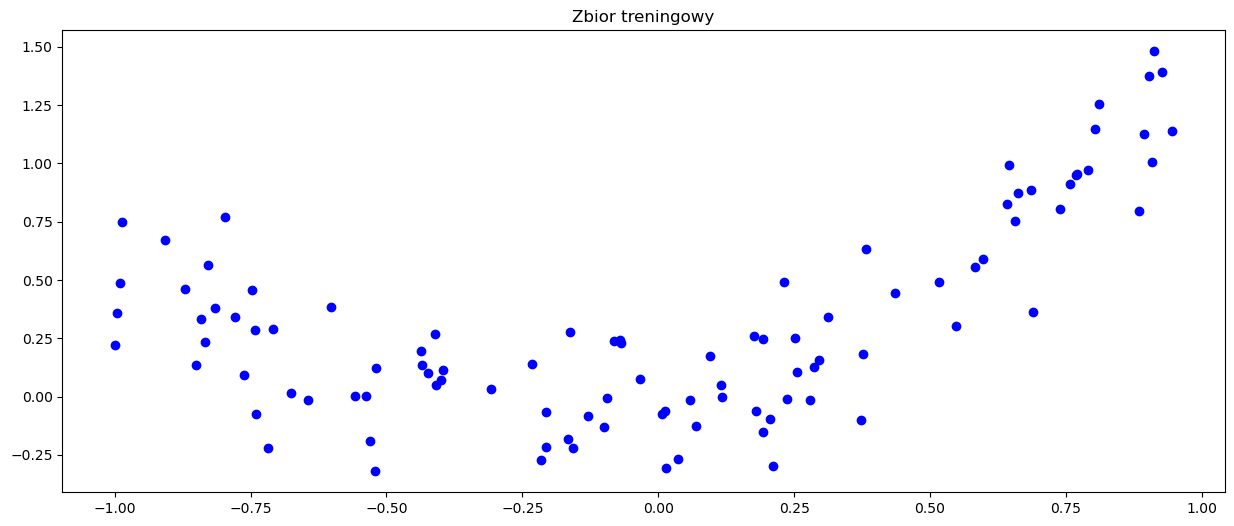

In [26]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.title('Zbior treningowy') 
plt.show()

Spróbujmy dopasować do tych danych model regresji liniowej.

In [27]:
reg2 = LinearRegression(positive=False,        
                       fit_intercept=True)    
reg2.fit(x_train,y_train)

LinearRegression()

In [28]:
print("Coefficient: ", reg2.coef_)
print("Intercept: ", reg2.intercept_)

Coefficient:  [[0.38355249]]
Intercept:  [0.32220545]


Sprawdźmy dopasowanie modelu do danych treningowych.

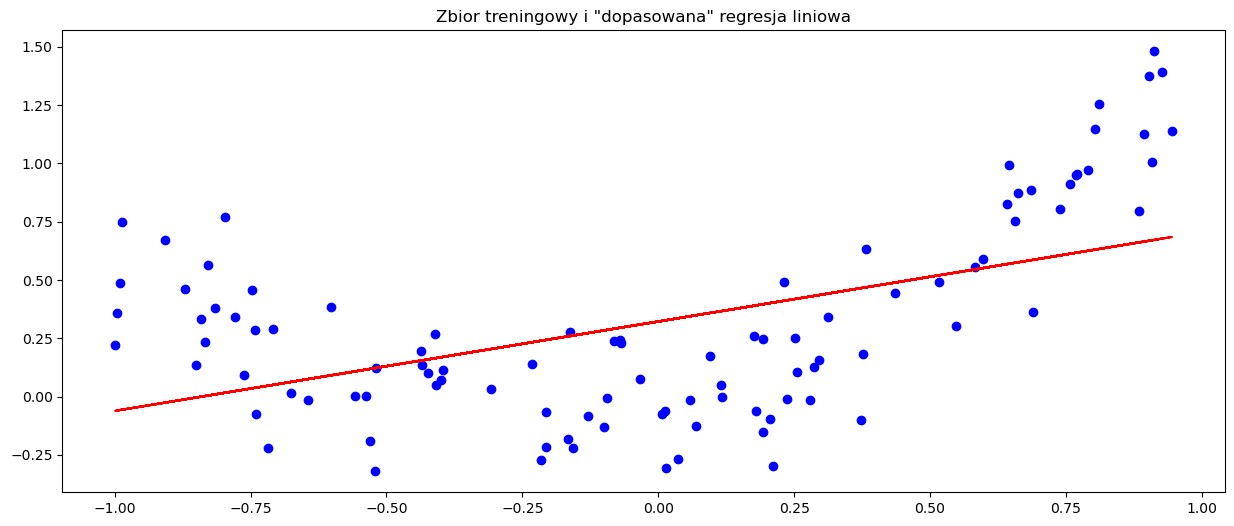

In [29]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.plot(x_train, x_train * reg2.coef_ + reg2.intercept_, c='r')
plt.title('Zbior treningowy i "dopasowana" regresja liniowa') 
plt.show()

In [30]:
preds3 = reg2.predict(x_valid)

wyniki3 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds3 - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds3)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds3)]}, 
                      index=['lin_reg']).style.background_gradient(cmap='Blues')
wyniki3

,RSS,R2,MAE
lin_reg,2.193040,0.441041,0.246324


Jak widzimy, model regresji liniowej nie dał dobrego dopasowania do nowego zbioru danych. Stało się tak dlatego, że relacja pomiędzy zmienną objaśniającą a zmienną objaśnianą po prostu nie jest liniowa, a co za tym idzie, modele liniowe nie będą dawać nam zadowalającej skuteczności. W takim wypadku, siłą rzeczy, powinniśmy posłużyć się modelami nieliniowymi. Pierwszym z nich jest regresja wielomianowa.

Najprostszą formą regresji wielomianowej jest regresja kwadratowa, której równanie jest dane jako

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon,$$

gdzie oczywiście zakładamy, że mamy jedną zmienną objaśniającą i jedną zmienną objaśnianą. W ogólności, możemy modelować oczekiwaną wartość $y$ wielomianem n-tego stopnia, uzyskując równanie ogólne postaci

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon.$$

Można zauważyć, że z punktu widzenia estymacji ten model jest liniowy, gdyż funkcja regresji jest liniowa względem nieznanych parametrów $\beta_0,\beta_1,...,\beta_n$. Zatem, stosując metodę najmniejszych kwadratów, taki model może być traktowany jak model regresji liniowej wielu zmiennych, przy założeniu, że $x,x^2,...x^n$ są różnymi, niezależnymi zmiennymi w takim modelu.

Podobnie jak wcześniej, współczynniki $\beta$ są dane wzorem

$$ \hat{\beta} = (X^TX)^{-1} X^T y.$$

Na początek zamodelujemy dane regresją kwadratową.

In [31]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_valid_poly = poly.transform(x_valid)

Funkcja PolynomialFeatures wyznacza wielomiany złożone z cech numerycznych zadanej ramki danych. W naszym wypadku, jeśli mamy do dyspozycji jedną cechę $x$ oraz wyznaczamy cechy wielomianowe drugiego stopnia, powstanie nam nowa cecha $x^2$ oraz dodatkowa cecha, która dla każdego rekordu przyjmuje wartość $1$. Natomiast, jeśli mielibyśmy dwie cechy $[x_1,x_2]$, to lista nowych cech wyglądałaby następująco: $[1,x_1,x_2,x_1^2,x_1 x_2,x_2^2]$, gdzie wszystkie cechy trafiłyby do modelu.

In [32]:
reg3 = LinearRegression(positive=False,        
                       fit_intercept=True)    
reg3.fit(x_train_poly,y_train)

LinearRegression()

In [33]:
print("Coefficient: ", reg3.coef_)
print("Intercept: ", reg3.intercept_)

Coefficient:  [[0.         0.42997276 1.02119995]]
Intercept:  [-0.01564705]


In [34]:
y_pred_reg3 = reg3.predict(x_valid_poly)

In [35]:
df_plot_squarereg = pd.DataFrame(
    {'x': np.reshape(x_train, (100,)), 
    'prediction': x_train_poly[:,1] * reg3.coef_[:,1] + x_train_poly[:,2] * reg3.coef_[:,2] + reg3.intercept_
    }).sort_values(by = 'x')

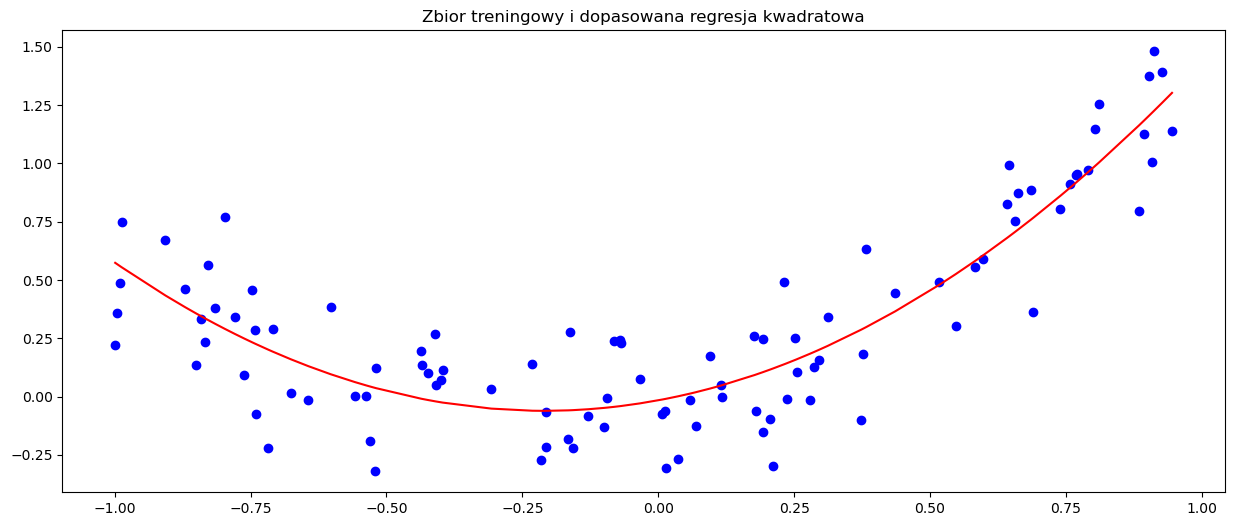

In [36]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.plot(df_plot_squarereg['x'],  df_plot_squarereg['prediction'], c='r')
plt.title('Zbior treningowy i dopasowana regresja kwadratowa') 
plt.show()

In [37]:
preds4 = reg3.predict(x_valid_poly)

wyniki4 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds3 - y_valid)),
                                      np.sum(np.square(preds4 - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds3),
                                    metrics.r2_score(y_valid, preds4)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds3),
                                    metrics.mean_absolute_error(y_valid, preds4)]}, 
                      index=['lin_reg', 'square_reg']).style.background_gradient(cmap='Blues')
wyniki4

,RSS,R2,MAE
lin_reg,2.193040,0.441041,0.246324
square_reg,0.710297,0.818960,0.131138


Zgodnie z oczekiwaniami, model regresji kwadratowej dał o wiele lepsze dopasowanie. Teraz sprawdźmy jeszcze co stanie się, gdy znacznie zwiększymy stopień wielomianu dla powyższych danych.

In [38]:
poly100 = PolynomialFeatures(degree = 100)
x_train_poly100 = poly100.fit_transform(x_train)
x_valid_poly100 = poly100.transform(x_valid)

In [39]:
reg4 = LinearRegression(positive=False,        
                       fit_intercept=True)    
reg4.fit(x_train_poly100,y_train)

LinearRegression()

In [40]:
print("Coefficient: ", reg4.coef_)
print("Intercept: ", reg4.intercept_)

Coefficient:  [[ 4.11846707e+11 -6.03922906e+00  5.21260366e+01  1.15852671e+03
  -6.63785012e+03 -7.65800152e+04  3.60038780e+05  2.56896147e+06
  -1.08156840e+07 -5.03644365e+07  2.02058145e+08  6.24663768e+08
  -2.49979148e+09 -5.13226856e+09  2.12921671e+10  2.84848766e+10
  -1.27729474e+11 -1.05632433e+11  5.44020598e+11  2.43849145e+11
  -1.62938233e+12 -2.52681023e+11  3.29999553e+12 -2.83617193e+11
  -4.03202828e+12  1.25692502e+12  1.74893720e+12 -1.24438321e+12
   2.09989233e+12 -5.66534359e+11 -2.17661172e+12  1.51031542e+12
  -1.59424484e+12  4.99601475e+11  1.59836104e+12 -1.31600937e+12
   1.97737956e+12 -1.10692226e+12 -5.15054843e+11  7.74893496e+11
  -2.04766180e+12  1.51112229e+12 -1.01267739e+12  4.41767033e+11
   1.01098758e+12 -9.65714353e+11  1.78476613e+12 -1.41732707e+12
   9.11175362e+11 -6.03795084e+11 -8.09555278e+11  8.37888572e+11
  -1.53714047e+12  1.37955962e+12 -1.13109768e+12  9.80190765e+11
   8.30938207e+09 -1.87897086e+11  1.09384748e+12 -1.04670843e

In [41]:
formula = 0
for i in range(1,101):
    formula = formula + x_train_poly100[:,i] * reg4.coef_[:,i]

In [42]:
df_plot_squarereg2 = pd.DataFrame(
    {'x': np.reshape(x_train, (100,)), 
    'prediction': formula + reg3.intercept_
    }).sort_values(by = 'x')

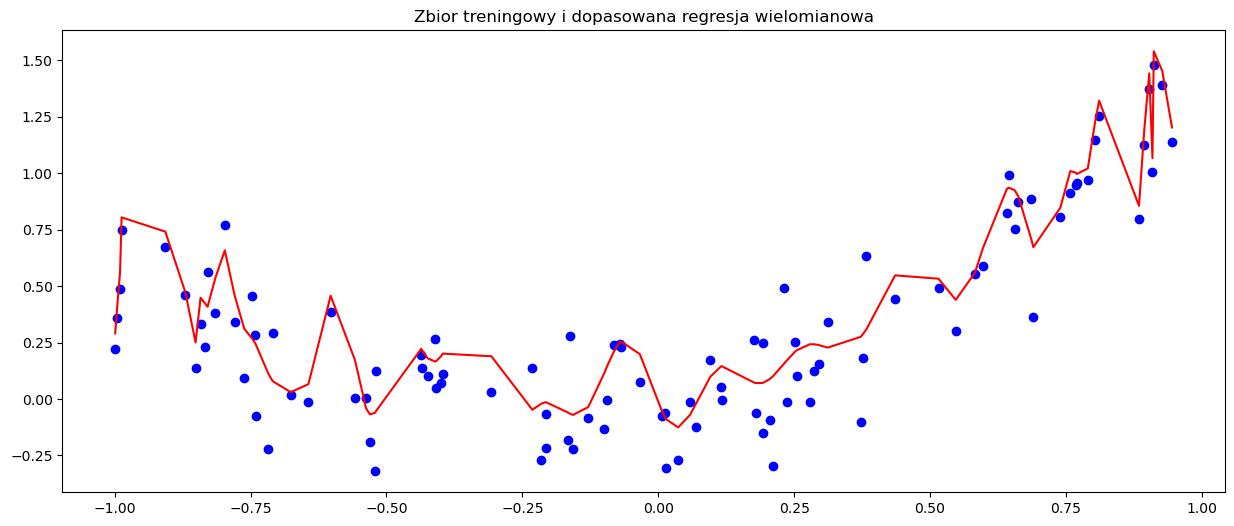

In [43]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.plot(df_plot_squarereg2['x'],  df_plot_squarereg2['prediction'], c='r')
plt.title('Zbior treningowy i dopasowana regresja wielomianowa') 
plt.show()

Sprawdźmy wartości metryk na zbiorze walidacyjnym.

In [44]:
preds5 = reg4.predict(x_valid_poly100)

wyniki5 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds4 - y_valid)),
                                      np.sum(np.square(preds5 - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds4),
                                    metrics.r2_score(y_valid, preds5)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds4), 
                                     metrics.mean_absolute_error(y_valid, preds5)]}, 
                      index=['square_reg', 'poly_reg']).style.background_gradient(cmap='Blues')
wyniki5

,RSS,R2,MAE
square_reg,0.710297,0.818960,0.131138
poly_reg,9287805872.725283,-2367264492.430457,3855.230793


Jak można było się spodziewać, model jest teraz mocno przeuczony. Stosując model regresji wielomianowej należy pamiętać o ryzyku przeuczenia modelu, które wzrasta wraz ze wzrostem stopnia wielomianu. Oczywiście, zapobiec temu problemowi może regularyzacja, którą można stosować analogicznie jak w regresji liniowej.
***

## Sieci neuronowe

Sieci neuronowe to funkcje ideowo oparte o konstrukcję zwierzęcego mózgu. Składają się one z warstw neuronów, które pobierają liczby, transformują je i przekazują do kolejnych warstw. Pierwszą warstwę nazywa się wejściową, ostatnią wyjściową, zaś wszystkie warstwy pomiędzy nazywa się ukrytymi. Z reguły każdy neuron z warstwy $k$ jest połączony z każdym neuronem z warstwy $k+1$.

<!-- <img src="media/neural_net.png" width=700 height=400 />
 -->
![media](media/neural_net.png)


Formalnie, sieć neuronową można zdefiniować jako naprzemienne złożenie $n$ funkcji afinicznych i $n$ funkcji zwanych aktywacyjnymi, z których każda, poza ostatnią, nie może być wielomianem. Wzór ogólny sieci, która ma $n-1$ warstw ukrytych, dany jest jako

$$f_\mathcal{N}(\mathbf{x})=\big(\sigma_n\circ W_n\circ ... \circ\sigma_2\circ W_2\circ\sigma_1\circ W_1\big) (\mathbf{x}),$$


gdzie $W_I$ to funkcje afiniczne, czyli postaci $W_i(x)=A_i(x)+B_i$, gdzie $A_i$ to funkcja liniowa, a $B_i$ jest wektorem, zaś $\sigma_i$ to funkcje aktywacyjne. Wartości funkcji afinicznych nazywa się wagami i to one są dopasowywane w procesie uczenia sieci. W regresji ostatnia funkcja aktywacyjna dana jest wzorem $\sigma_n(x)=x$. Fakt, że w warstwach ukrytych funkcje aktywacyjne nie są wielomianami, nadaje sieciom nieliniowość, która jest motorem napędowym ich skuteczności. W szczególności, taka postać tych funkcji sprawia, że sieci neuronowe mają tę samą własność co wielomiany w twierdzeniu Weierstrassa - są gęste w zbiorze funkcji ciągłych. Link do twierdzenia: https://en.wikipedia.org/wiki/Universal_approximation_theorem.

Sieci neuronowe uczą się z wykorzystaniem algorytmów minimalizacji straty, takich jak spadek gradientu, oraz przy użyciu algorytmu propagacji wstecznej - strata jest minimalizowana z warstwy do warstwy, rozpoczynając od ostatniej, czyli wyjściowej.

Taka sieć jest jednak dopiero podstawą dla bardziej zaawansowanych i częściej stosowanych sieci. Do takich zalicza się sieci konwolucyjne (CNN), rekurencyjne (RNN) czy grafowe (GNN). Regresja jest tylko jednym z wielu zastosowań sieci. Warto również wspomnieć, że z reguły sieci neuronowe uczą się tym lepiej, im więcej danych mają do dyspozycji.
***

## Bibliografia

- https://scikit-learn.org/stable/modules/linear_model.html#
- *The Elements of Statistical Learning* Trevor Hastie, Robert Tibshirani, Jerome Friedman. Second Edition. 
- https://en.wikipedia.org/wiki/Polynomial_regression
- https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc